In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Problem parameters
independent_simulations = 10
max_iterations = 10
swarm_size = 50
dim = 30
w_ini = 1
c1 = 1.5
c2 = 2.5
limits = (-5.12, 5.12)

# User defined parameters
w_fin = 0.25  # Usually lies between 0.1 to 0.5

In [3]:
# Function to be minimized
def objective_function(particle):
    return np.sum(particle**2 - 10*np.cos(2*particle*np.pi) + 10)

In [4]:
# Function to generate swarm
def generate_swarm(row:int, col:int):
    return np.random.uniform(limits[0], limits[1]+1e-6, size=(row, col))

In [5]:
def update_velocity(velocity_vector, curr_pos, pbest, gbest, w):
    r1 = np.random.rand()
    r2 = np.random.rand()
    return w * velocity_vector + c1 * r1 * (pbest - curr_pos) + c2 * r2 * (gbest - curr_pos)

In [6]:
# PSO
gbest_simulation = []
pbest_simulation = []
convergence_curve = []

for _ in range(independent_simulations):
    swarm_position = generate_swarm(dim, swarm_size)
    swarm_velocities = np.zeros_like(swarm_position)

    pbest_position = np.copy(swarm_position)
    pbest_value = np.apply_along_axis(objective_function, 0, pbest_position).reshape(1, swarm_size)

    gbest_position = pbest_position[:, np.argmin(pbest_value)].reshape(dim, 1)

    pbest_iteration = []
    gbest_iteration = []
    for iteration_number in range(max_iterations):
        w = w_ini - ((w_ini - w_fin) * iteration_number)/max_iterations
        for indx in range(swarm_size):
            curr_velocity = swarm_velocities[:, indx].reshape(dim, 1)
            curr_position = swarm_position[:, indx].reshape(dim, 1)
            best_position = pbest_position[:, indx].reshape(dim, 1)
            new_velocity = update_velocity(curr_velocity, curr_position, best_position, gbest_position, w)

            for i in range(dim):
                swarm_velocities[i, indx] += new_velocity[i, 0]
                swarm_position[i, indx] += swarm_velocities[i, indx]

            new_value = objective_function(swarm_position[:, indx])
            if new_value < pbest_value[0, indx]:
                pbest_value[0, indx] = new_value
                for i in range(dim):
                    pbest_position[i, indx] = swarm_position[i, indx]

            gbest_position = pbest_position[:, np.argmin(pbest_value)].reshape(dim, 1)
        
        gbest_iteration.append(objective_function(gbest_position))
        
        pbest_iteration.append(np.copy(pbest_value))

    gbest_simulation.append(objective_function(gbest_position))
    pbest_simulation.append(pbest_iteration)
    convergence_curve.append(gbest_iteration)

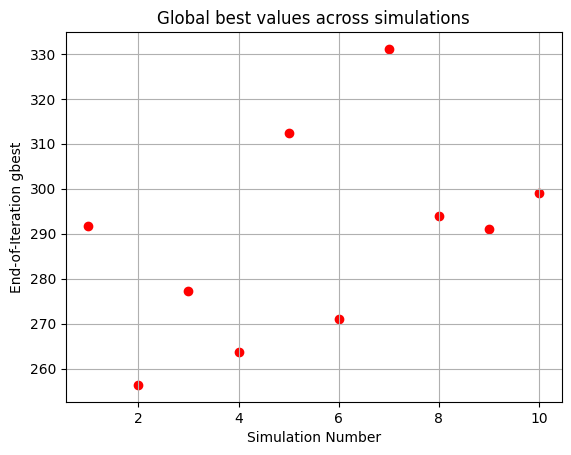

In [7]:
# Plot the end-of-iteration global best values of each simulation
plt.scatter(range(1, independent_simulations+1), gbest_simulation, c='r', marker='o')
plt.xlabel('Simulation Number')
plt.ylabel('End-of-Iteration gbest')
plt.grid(True)
plt.title('Global best values across simulations')
plt.savefig('Global_values_sim.pdf', format='pdf')

In [8]:
# Plotting the pbest values of each particle in all iterations simulation-wise
with PdfPages('Simulation-wise_Iteration.pdf') as pdf:
    for i in range(independent_simulations):
        plt.figure(figsize=(15, 6))
        plt.title(f'Simulation {i+1}')
        plt.xlabel('Particle')
        plt.ylabel('End-of-Iteration pbest_value')
        plt.grid()
        for j in range(max_iterations):
            plt.plot(pbest_simulation[i][j][0, :], label=f'Iteration {j+1}')
        plt.legend(bbox_to_anchor=(1, 1))
        pdf.savefig()
        plt.close()

In [15]:
# Plotting the convergence curve of gbest values for each simulation
with PdfPages('Convergence.pdf') as pdf:
    plt.figure(figsize=(15, 6))
    plt.title('Convergence Curve')
    plt.xlabel('Iteration Number')
    plt.ylabel('End-of-Iteration gbest_value')

    for i in range(independent_simulations):
        plt.plot(convergence_curve[i], label=f'Simulation {i+1}')

    plt.legend(bbox_to_anchor=(1, 1))
    plt.grid()
    pdf.savefig()
    plt.close()